#Dataset

In [1]:
import cv2 # OpenCV
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import os
import tensorflow_datasets as tfds
import pandas as pd
# from keras.preprocessing.image import ImageDataGenerator
path = "FULL"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   validation_split=0.5)
training_set = train_datagen.flow_from_directory(path+"/train",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True)
validation_set = train_datagen.flow_from_directory(path+"/test",
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')

Found 15923 images belonging to 7 classes.
Found 3976 images belonging to 7 classes.


# Read file

In [4]:
def parse_image(filename):
  parts = filename.split('/')
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [224, 224])
  return image, label

def load_data(dir, manual_labelling=-1, class_names=None):
    dir_names = os.listdir(dir)

    X = []
    y = []
    for i in range(len(dir_names)):
        class_dir = dir + "/" + dir_names[i]
        filenames = os.listdir(class_dir)

        images = []
        print("reading", class_dir)
        total = len(filenames)
        count = 0
        for file in filenames:
            image, label = parse_image(class_dir + "/" + file)
            X.append(image)

            if manual_labelling != -1:
                y.append(manual_labelling)
            else:
                if label == 'angry':
                    y.append(0)
                elif label == 'disgust':
                    y.append(1)
                elif label == 'fear':
                    y.append(2)
                elif label == 'happy':
                    y.append(3)
                elif label == 'neutral':
                    y.append(4)
                elif label == 'sad':
                    y.append(5)
                elif label == 'suprise':
                    y.append(6)
                else:
                    print("NO LABEL")
            count+=1
    if manual_labelling != -1:
        return tf.stack(X), tf.stack(y), class_names
    else:
        return tf.stack(X), tf.one_hot(tf.stack(y), len(class_names))

In [3]:
angry_set_x, angry_set_y = load_data(path+"/testing/test_angry", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

disgust_set_x, disgust_set_y = load_data(path+"/testing/test_disgust", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

fear_set_x, fear_set_y = load_data(path+"/testing/test_fear", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

happy_set_x, happy_set_y = load_data(path+"/testing/test_happy", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

neutral_set_x, neutral_set_y = load_data(path+"/testing/test_neutral", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

sad_set_x, sad_set_y = load_data(path+"/testing/test_sad", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

suprise_set_x, suprise_set_y = load_data(path+"/testing/test_suprise", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])


reading FULL/testing/test_angry/angry
reading FULL/testing/test_disgust/disgust
reading FULL/testing/test_fear/fear
reading FULL/testing/test_happy/happy
reading FULL/testing/test_neutral/neutral
reading FULL/testing/test_sad/sad
reading FULL/testing/test_suprise/suprise


In [5]:

stress_set_x, stress_set_y = load_data(path+"/testing/stress", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])

reading FULL/testing/stress/angry
reading FULL/testing/stress/disgust
reading FULL/testing/stress/fear


In [12]:
non_stress_set_x, non_stress_set_y = load_data(path+"/testing/non_stress", class_names=['suprise', 'sad', 'neutral', 'happy', 'fear', 'disgust', 'angry'])


reading FULL/testing/non_stress/happy
reading FULL/testing/non_stress/neutral
reading FULL/testing/non_stress/sad
reading FULL/testing/non_stress/suprise


# Evaluate untuk data test

In [9]:
VGG19_FineTune = tf.keras.models.load_model('VGG19Augmented_TrainableBanyak4.keras')
VGG19_FullFreeze = tf.keras.models.load_model('VGG19Augmented_Freeze4.keras')
VGG19_Reverse = tf.keras.models.load_model('VGG19_TrainableDikit_87.keras')

VGG19_FineTune.evaluate(validation_set)
VGG19_Reverse.evaluate(validation_set)
VGG19_FullFreeze.evaluate(validation_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 432s 7s/step - accuracy: 0.5371 - loss: 2.1026
63/63 ━━━━━━━━━━━━━━━━━━━━ 426s 7s/step - accuracy: 0.5186 - loss: 1.7201
63/63 ━━━━━━━━━━━━━━━━━━━━ 420s 7s/step - accuracy: 0.5142 - loss: 1.3464


[1.3310374021530151, 0.5138329863548279]

In [2]:
VGG19_FineTune = tf.keras.models.load_model('VGG19Augmented_TrainableBanyak4.keras')
VGG19_FullFreeze = tf.keras.models.load_model('VGG19Augmented_Freeze4.keras')
VGG19_Reverse = tf.keras.models.load_model('VGG19_TrainableDikit_87.keras')

# FineTune

In [5]:
print('angry:')
VGG19_FineTune.evaluate(angry_set_x, angry_set_y)

print('disgust:')
VGG19_FineTune.evaluate(disgust_set_x, disgust_set_y)

print('fear:')
VGG19_FineTune.evaluate(fear_set_x, fear_set_y)

print('happy:')
VGG19_FineTune.evaluate(happy_set_x, happy_set_y)

print('neutral:')
VGG19_FineTune.evaluate(neutral_set_x, neutral_set_y)

print('sad:')
VGG19_FineTune.evaluate(sad_set_x, sad_set_y)

print('suprise:')
VGG19_FineTune.evaluate(suprise_set_x, suprise_set_y)

angry:
34/34 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.2832 - loss: 2.8601
disgust:
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.0657 - loss: 8.8414
fear:
36/36 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.3114 - loss: 2.5786
happy:
60/60 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.6506 - loss: 1.5061
neutral:
42/42 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.4421 - loss: 1.9835
sad:
43/43 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.2807 - loss: 2.4507
suprise:
31/31 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.5489 - loss: 2.2486


[1.4141616821289062, 0.6794605851173401]

In [8]:
print('stress:')
VGG19_FineTune.evaluate(stress_set_x, stress_set_y)

stress:
76/76 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.2830 - loss: 3.1274


[3.017714738845825, 0.31090009212493896]

In [13]:
print('non-stress:')
VGG19_FineTune.evaluate(non_stress_set_x, non_stress_set_y)

non-stress:
173/173 ━━━━━━━━━━━━━━━━━━━━ 573s 3s/step - accuracy: 0.5623 - loss: 1.7703


[1.9417508840560913, 0.4967438578605652]

# Full Freeze

In [6]:
print('angry:')
VGG19_FullFreeze.evaluate(angry_set_x, angry_set_y)

print('disgust:')
VGG19_FullFreeze.evaluate(disgust_set_x, disgust_set_y)

print('fear:')
VGG19_FullFreeze.evaluate(fear_set_x, fear_set_y)

print('happy:')
VGG19_FullFreeze.evaluate(happy_set_x, happy_set_y)

print('neutral:')
VGG19_FullFreeze.evaluate(neutral_set_x, neutral_set_y)

print('sad:')
VGG19_FullFreeze.evaluate(sad_set_x, sad_set_y)

print('suprise:')
VGG19_FullFreeze.evaluate(suprise_set_x, suprise_set_y)

angry:
34/34 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.1130 - loss: 3.3082
disgust:
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.0000e+00 - loss: 15.8863
fear:
36/36 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.0965 - loss: 4.6116
happy:
60/60 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.2146 - loss: 2.6005
neutral:
42/42 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.3833 - loss: 1.6931
sad:
43/43 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.5838 - loss: 1.2714
suprise:
31/31 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.2756 - loss: 5.2176


[3.2361221313476562, 0.3578838109970093]

In [9]:
print('stress:')
VGG19_FullFreeze.evaluate(stress_set_x, stress_set_y)

stress:
76/76 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.1060 - loss: 3.9351


[4.00652551651001, 0.10611065477132797]

In [14]:
print('non-stress:')
VGG19_FullFreeze.evaluate(non_stress_set_x, non_stress_set_y)

non-stress:
173/173 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.2731 - loss: 2.3404


[2.127098798751831, 0.3733719289302826]

# Reverse

In [7]:
print('angry:')
VGG19_Reverse.evaluate(angry_set_x, angry_set_y)

print('disgust:')
VGG19_Reverse.evaluate(disgust_set_x, disgust_set_y)

print('fear:')
VGG19_Reverse.evaluate(fear_set_x, fear_set_y)

print('happy:')
VGG19_Reverse.evaluate(happy_set_x, happy_set_y)

print('neutral:')
VGG19_Reverse.evaluate(neutral_set_x, neutral_set_y)

print('sad:')
VGG19_Reverse.evaluate(sad_set_x, sad_set_y)

print('suprise:')
VGG19_Reverse.evaluate(suprise_set_x, suprise_set_y)

angry:
34/34 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.2901 - loss: 2.0622
disgust:
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.1692 - loss: 6.4176
fear:
36/36 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.1824 - loss: 2.7413
happy:
60/60 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.7726 - loss: 0.6844
neutral:
42/42 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.2666 - loss: 2.2036
sad:
43/43 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.3738 - loss: 1.8342
suprise:
31/31 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.3962 - loss: 2.7321


[2.003061532974243, 0.5093361139297485]

In [10]:
print('stress:')
VGG19_Reverse.evaluate(stress_set_x, stress_set_y)

stress:
76/76 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.2909 - loss: 2.2824


[2.420379161834717, 0.2762179970741272]

In [15]:
print('non-stress:')
VGG19_Reverse.evaluate(non_stress_set_x, non_stress_set_y)

non-stress:
173/173 ━━━━━━━━━━━━━━━━━━━━ 569s 3s/step - accuracy: 0.6379 - loss: 1.1062


[1.5623712539672852, 0.5142908692359924]

# Percobaan

## Image

In [2]:
label = list(validation_set.class_indices.keys())

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import imageio
from tensorflow_docs.vis import embed

In [4]:
def predict(path, model, count, lenght):
    image = cv2.imread(path)
    image = cv2.resize(image,(224,224))
    image_arr = image.reshape(1,224,224,3)

    predicted = model.predict(image_arr)
    predicted = tf.concat(predicted, axis=0)
    predicted = tf.argmax(predicted, axis=1)
    fig = plt.figure(figsize=(10, 7)) 
    fig.add_subplot(1, lenght, count) 
    plt.title(label[predicted.numpy()[0]])
    plt.imshow(image)


In [5]:
VGG19_FineTune = tf.keras.models.load_model('VGG19Augmented_TrainableBanyak4.keras')
VGG19_FullFreeze = tf.keras.models.load_model('VGG19Augmented_Freeze4.keras')
VGG19_Reverse = tf.keras.models.load_model('VGG19_TrainableDikit_87.keras')

In [10]:
path = [
    "test/test/test1.jpg", "test/test/test2.jpg", "test/test/test3.png","test/test/test4.jpg", 
    "test/test/test5.jpg", "test/test/test6.jpg", "test/test/test7.jpg", "test/test/test8.jpg",
    "test/test/test9.jpg", "test/test/test10.jpg"
    ]


In [11]:
path2 = ["test/test/test11.jpg", "test/test/test12.jpg", 
    "test/test/test13.jpg", "test/test/test14.jpg", "test/test/test15.jpg", "test/test/test16.jpg",
    "test/test/test17.jpg", "test/test/test18.jpg", "test/test/test19.jpg"]

In [12]:
path3 = ["test/test/test20.jpg",
    "test/test/test21.jpg", "test/test/test22.jpg", "test/test/test23.jpg","test/test/test24.jpg",
    "test/test/test25.jpg", "test/test/test26.jpg"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


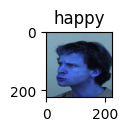

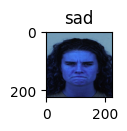

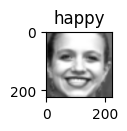

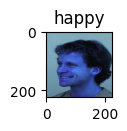

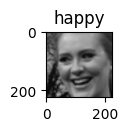

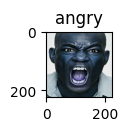

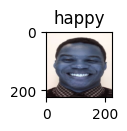

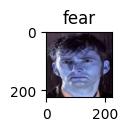

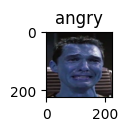

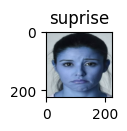

In [13]:
count = 1
for temp in path:
    predict(temp, VGG19_FineTune, count, len(path))
    count= count + 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


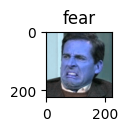

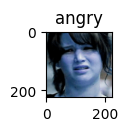

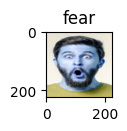

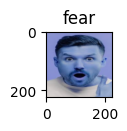

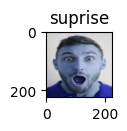

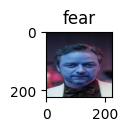

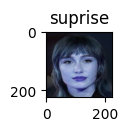

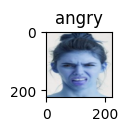

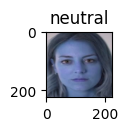

In [14]:
count = 1
for temp in path2:
    predict(temp, VGG19_FineTune, count, len(path))
    count= count + 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


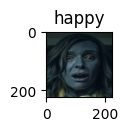

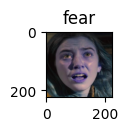

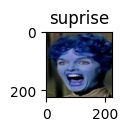

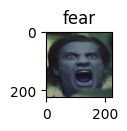

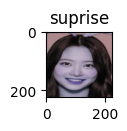

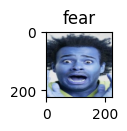

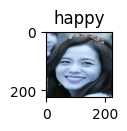

In [15]:
count = 1
for temp in path3:
    predict(temp, VGG19_FineTune, count, len(path))
    count= count + 1

## Video

In [16]:
def format_frames(frame, output_size):
  """
    Pad and resize an image from a video.

    Args:
      frame: Image that needs to resized and padded.
      output_size: Pixel size of the output frame image.

    Return:
      Formatted frame with padding of specified output size.
  """
  frame = tf.image.convert_image_dtype(frame, tf.float32)
  frame = tf.image.resize_with_pad(frame, *output_size)
  return frame

In [17]:
def frames_from_video_file(video_path, n_frames, output_size = (224,224), frame_step = 15):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  src = cv2.VideoCapture(str(video_path))

  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

  need_length = 1 + (n_frames - 1) * frame_step

  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)

  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  result.append(format_frames(frame, output_size))

  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:
      frame = format_frames(frame, output_size)
      result.append(frame)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  result = np.array(result)[..., [2, 1, 0]]

  return result

In [18]:
def to_gif(images, fps):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, duration=(5000 * 1/fps))
  return embed.embed_file('./animation.gif')

In [19]:
def predictVidio(testvidio, model, lenght, showImage= True):
    count = 1
    predictedVidio = [0,0,0,0,0,0,0]
    for image in testvidio:
        image = cv2.resize(image,(224,224))
        image_arr = image.reshape(1,224,224,3)

        predicted = model.predict(image_arr)
        predicted = tf.concat(predicted, axis=0)
        predicted = tf.argmax(predicted, axis=1)
        if showImage:
            fig = plt.figure(figsize=(2*lenght, 2*lenght)) 
            fig.add_subplot(1, lenght, count) 
            plt.title(label[predicted.numpy()[0]])
            plt.imshow(image)
        predictedVidio[predicted.numpy()[0]] += 1
        count = count+1
    return predictedVidio


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']
[6, 0, 1, 2, 8, 1, 2]


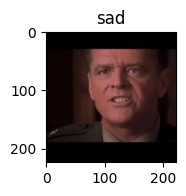

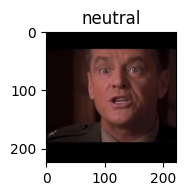

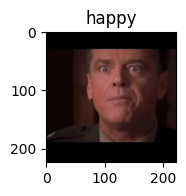

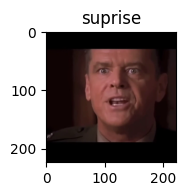

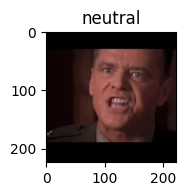

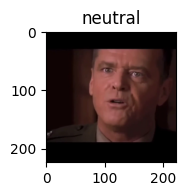

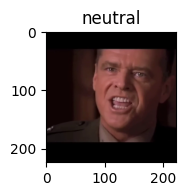

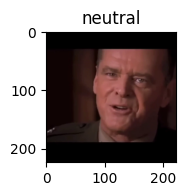

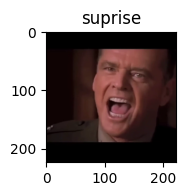

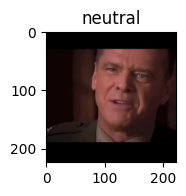

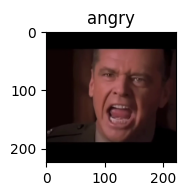

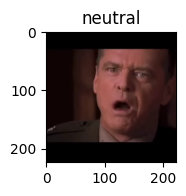

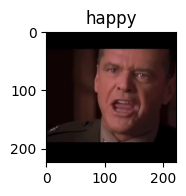

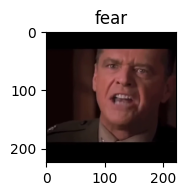

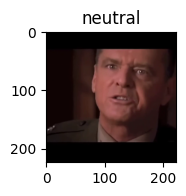

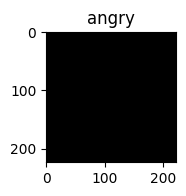

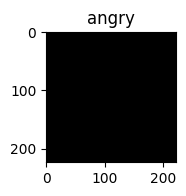

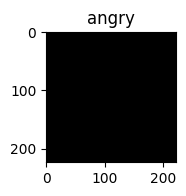

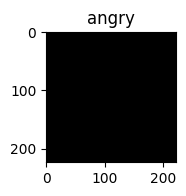

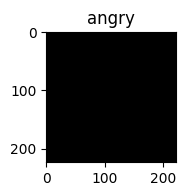

In [21]:
testvidio = frames_from_video_file("test/test/testvid5.mp4", 20)
result = predictVidio(testvidio, VGG19_FineTune, 20, True)
print(label)
print(result)
# to_gif(testvidio, 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']
[3, 0, 0, 4, 1, 9, 3]


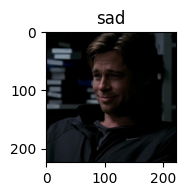

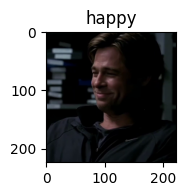

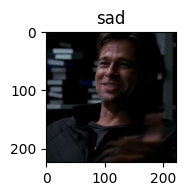

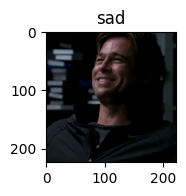

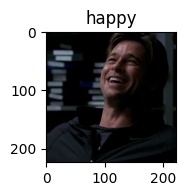

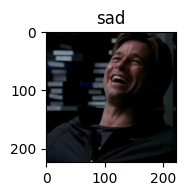

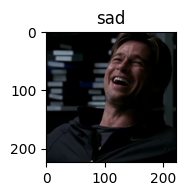

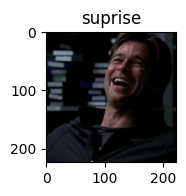

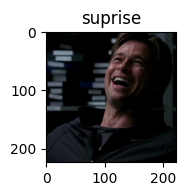

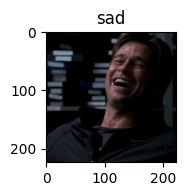

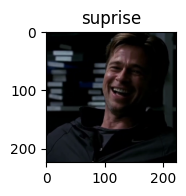

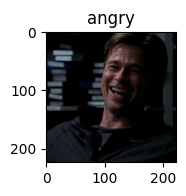

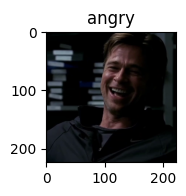

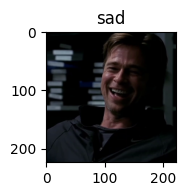

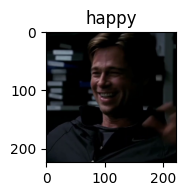

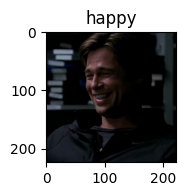

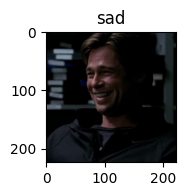

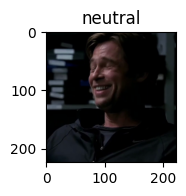

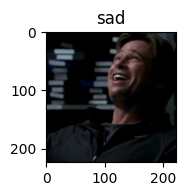

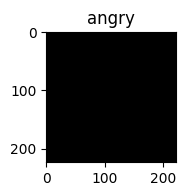

In [22]:
testvidio = frames_from_video_file("test/test/testvid4.mp4", 20)
result = predictVidio(testvidio, VGG19_FineTune, 20, True)
print(label)
print(result)
# to_gif(testvidio, 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']
[9, 0, 7, 0, 0, 4, 0]


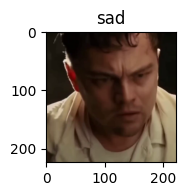

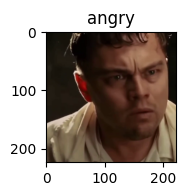

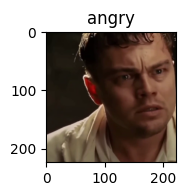

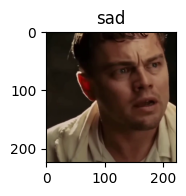

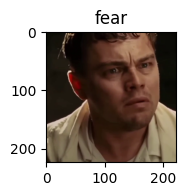

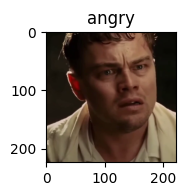

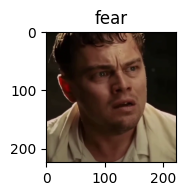

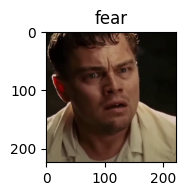

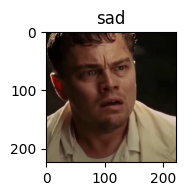

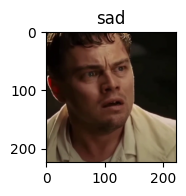

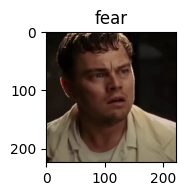

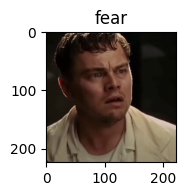

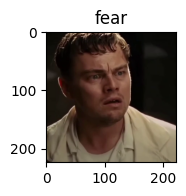

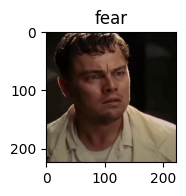

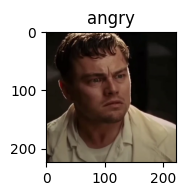

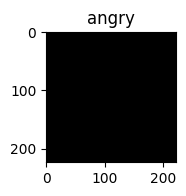

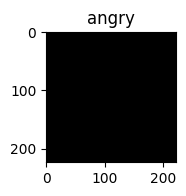

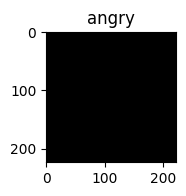

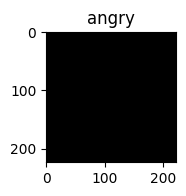

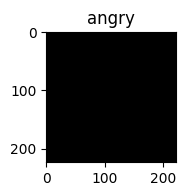

In [23]:
testvidio = frames_from_video_file("test/test/testvid3.mp4", 20)
result = predictVidio(testvidio, VGG19_FineTune, 20, True)
print(label)
print(result)
# to_gif(testvidio, 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']
[3, 0, 14, 0, 2, 0, 1]


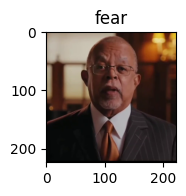

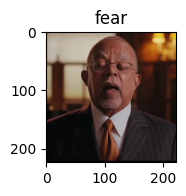

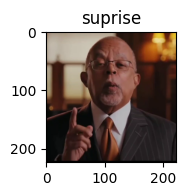

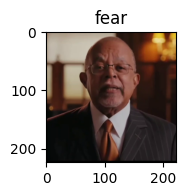

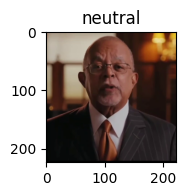

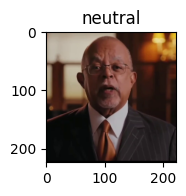

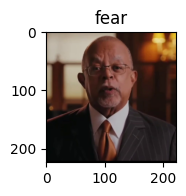

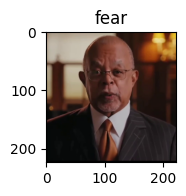

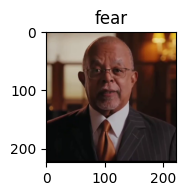

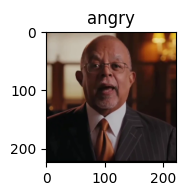

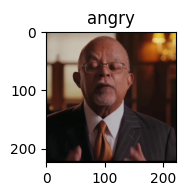

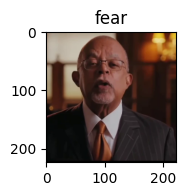

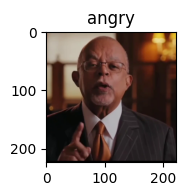

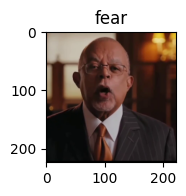

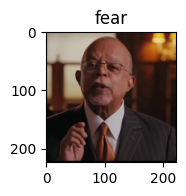

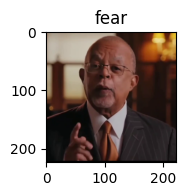

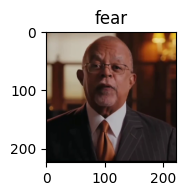

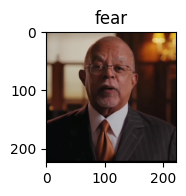

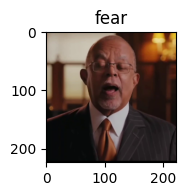

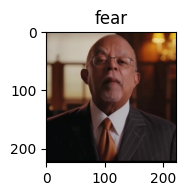

In [24]:
testvidio = frames_from_video_file("test/test/testvid2.mp4", 20)
result = predictVidio(testvidio, VGG19_FineTune, 20, True)
print(label)
print(result)
# to_gif(testvidio, 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']
[0, 0, 18, 0, 1, 0, 1]


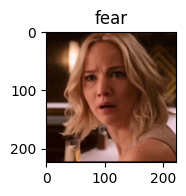

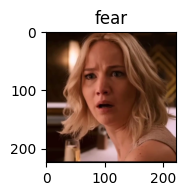

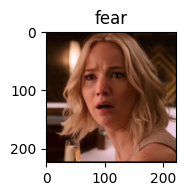

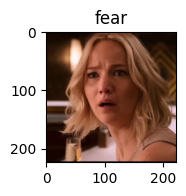

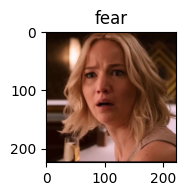

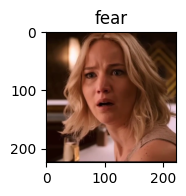

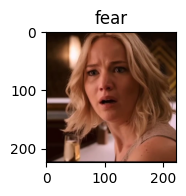

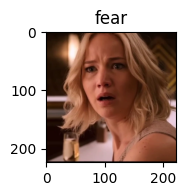

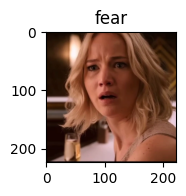

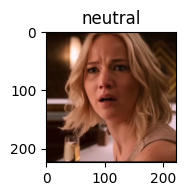

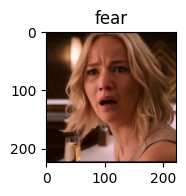

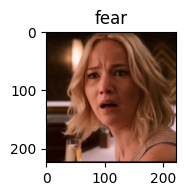

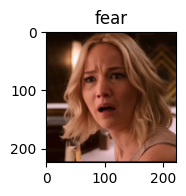

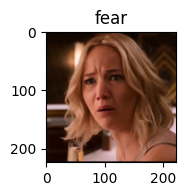

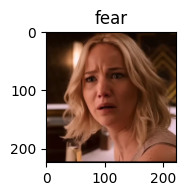

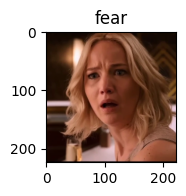

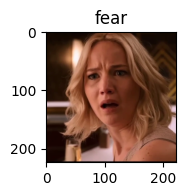

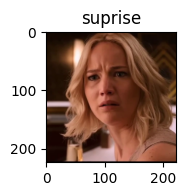

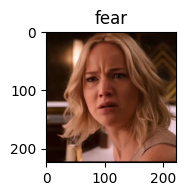

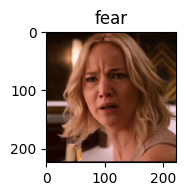

In [25]:
testvidio = frames_from_video_file("test/test/testvid1.mp4", 20)
result = predictVidio(testvidio, VGG19_FineTune, 20, True)
print(label)
print(result)
# to_gif(testvidio, 20)